# Fashion MNIST

In this notebook we will build an Image Classifier using the Sequential API.
The dataset used is Fashion MNIST which has 70,000 grayscale images of 28×28 pixels each, with 10 classes representing fashion items

Let's start with loading necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.8.2'

In [3]:
keras.__version__

'2.8.0'

Fashion MNIST is part of the keras datasets. The load_data() function gives the training and testing datasets

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Let's see the shape and type of the train set

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

Note that every image is represented as a 28×28 array rather than a
1D array of size 784. Moreover, the pixel intensities are represented as integers (from
0 to 255) rather than floats (from 0.0 to 255.0)

Note that the dataset is already split into a training set and a test set, but there is no
validation set, so let’s create one. Moreover, since we are going to train the neural network using Gradient Descent, we must scale the input features.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
y_train[0]

4

From the description in keras.datasets we get the labels for each classes

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

Now let's create a classification MLP with two hidden layers

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # to convert the input image into 1D array
# Alternately we can add keras.layers.InputLayer as the first layer, setting shape=[28,28]
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # softmax is used since the classes are exclusive

2022-09-25 10:31:59.176148: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-25 10:31:59.226114: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
# An alternate coding style
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
#    keras.layers.Dense(10, activation="softmax")
#])

The model’s summary() method displays all the model’s layers, including each layer’s
name (which is automatically generated unless you set it when creating the layer), its
output shape (None means the batch size can be anything), and its number of parame‐
ters. The summary ends with the total number of parameters, including trainable and
non-trainable parameters.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:

In [14]:
model.layers

In [15]:
model.layers[1].name

'dense'

In [16]:
model.get_layer('dense_1').name

'dense_1'

All the parameters of a layer can be accessed using its get_weights() and
set_weights() method. For a Dense layer, this includes both the connection weights
and the bias terms

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[ 0.0625544 ,  0.04102904, -0.02991423, ...,  0.02804768,
        -0.00687322, -0.05431868],
       [-0.02699228, -0.02145732,  0.06305754, ...,  0.07368673,
        -0.05090085,  0.04951871],
       [ 0.03156304, -0.06817424,  0.02274545, ..., -0.0350704 ,
         0.05470169,  0.04791225],
       ...,
       [ 0.04885369,  0.0455092 , -0.06491272, ..., -0.042671  ,
         0.02562164,  0.02133033],
       [ 0.02723138,  0.03877069,  0.05421038, ..., -0.04599163,
        -0.05819375,  0.01657111],
       [ 0.03529327,  0.01129949, -0.04298921, ..., -0.05743554,
        -0.00564005, -0.02683431]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compilinig the model

We use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

We are using Stochastic Gradient Descent as the optimizer. 

Finally, since this is a classifier, it’s useful to measure its "accuracy" during training
and evaluation.

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Training and Evaluating the Model

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7187 - accuracy: 0.7660 - val_loss: 0.5056 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 16s 10ms/step - loss: 0.4926 - accuracy: 0.8287 - val_loss: 0.4926 - val_accuracy: 0.8268
Epoch 3/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4464 - accuracy: 0.8430 - val_loss: 0.4401 - val_accuracy: 0.8466
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4184 - accuracy: 0.8530 - val_loss: 0.3945 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3979 - accuracy: 0.8605 - val_loss: 0.3832 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3801 - accuracy: 0.8660 - val_loss: 0.3793 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3666 - accuracy: 0.8708 - val_loss: 0.3716 - val_

The fit() method returns a History object containing the training parameters ( history.params ), the list of epochs it went through ( history.epoch ), and most importantly a dictionary ( history.history ) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if any)

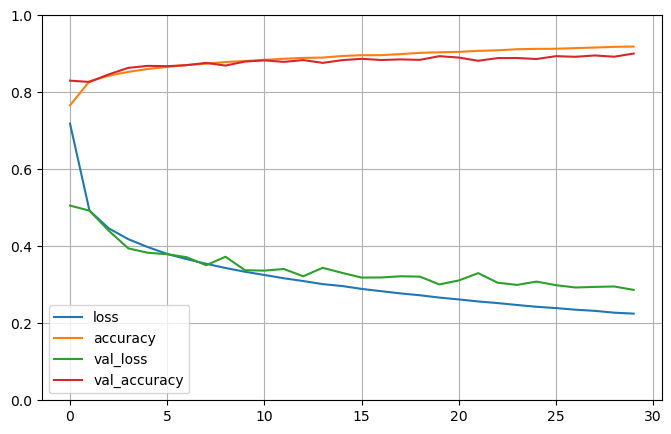

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 67.7870 - accuracy: 0.8467


[67.7869873046875, 0.8467000126838684]

Note that the loss is higher compared to validation set

# Using the Model to Make Predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you only care about the class with the highest estimated probability (even if that probability is quite low) then

In [26]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)